|                                                                                    |
|------------------------------------------------------------------------------------|
| 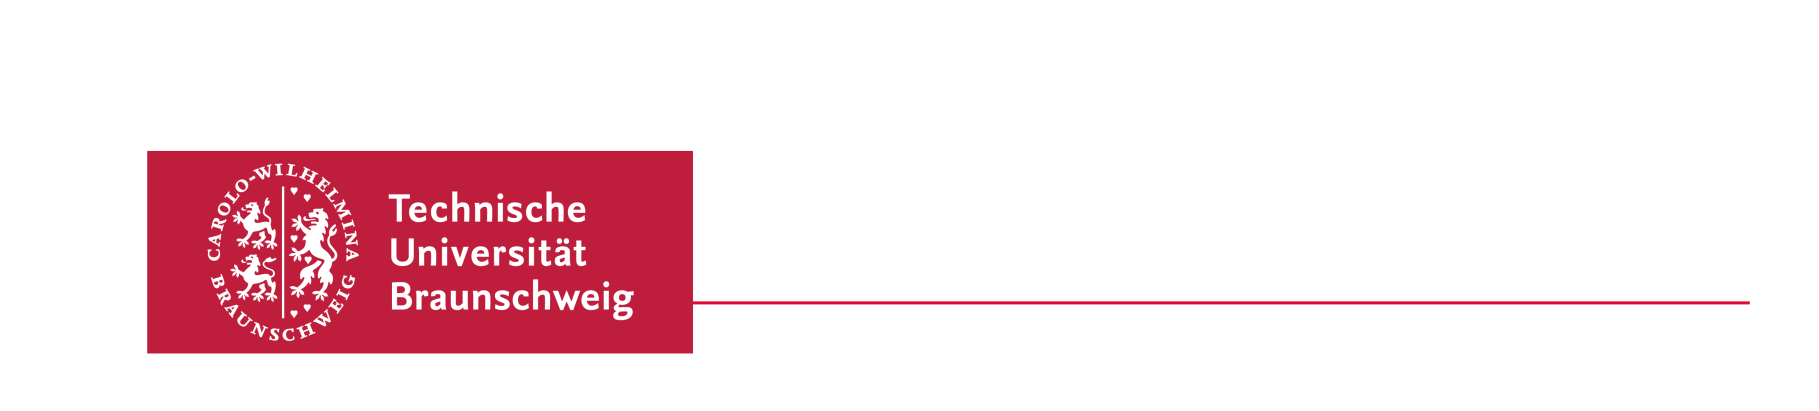 |

**  
Rechnerübung zur Signalübertragung II**

***Versuch 1: Fehlerwahrscheinlichkeit***

Es wird ein Empfänger betrachtet, der zunächst nur entscheiden soll, ob
der Sender ein bestimmtes Signal gesendet hat oder nicht. Diese
Entscheidung soll durch einen Schwellwertdetektor getroffen werden, der
den empfangenen Wert mit einer geeignet gewählten Schwelle vergleicht.
Da die Übertragung durch Rauschen gestört wird, treten am Empfänger mit
einer bestimmten Wahrscheinlichkeit Fehlentscheidungen auf.

**Teil 1.1 Verteilungsdichtefunktion von weißem, gaußverteiltem
Rauschen**

Die Gleichung für die Verteilungsdichtefunktion der Gaußverteilung
lautet:

$$p{}_{}$$

Dabei bedeutet die Standardabweichung bzw. Leistung, der Mittelwert des
Rauschens.

> Öffnen Sie die Datei „Versuch1.m“ und führen Sie das Programm aus.
> Betrachten Sie  
> „Figure 1“. Man kann erkennen, dass mit wachsender Rauschleistung die
> Verteilungsdichtefunktion breiter (und niedriger) wird.

**Teil 1.2 Sendestatistik bei unipolarer Übertragung**

$U_{0} = 0$wird mit der Wahrscheinlichkeit $p_{0}$ und
$U_{1} = + 2\ $mit der Wahrscheinlichkeit $p_{1}$ gesendet.Bei optimal
kodierter Quelle gilt:

$$p_{0} = 0.5$$

$p_{1} = 1 - p_{0}$ $p_{1} = 0.5$

Betrachten Sie nun „Figure 2“.

Hier entspricht die Fehlerwahrscheinlichkeit der Größe der Schnittfläche
der beiden  
Kurven, unter der Voraussetzung, dass die
Entscheiderschwelle$x = U_{E} = + 1$ ist.

Betrachten Sie nun „Figure 3“.

Es ist zu erkennen, dass mit zunehmender Rauschleistung die
Fehlerwahrscheinlichkeit  
zunimmt. Diese kann wieder verringert werden, indem die Sendeleistung
erhöht  
wird $(x = U = + 4)$.

Die Verteilungsdichtefunktionen mit erhöhter Sendeleistung sind in
„Figure 4“  
dargestellt.

**  
**

**Teil 1.3 Symbolfehlerwahrscheinlichkeit bei mehrstufiger Übertragung**

Aus den oben eingeführten Verteilungsdichtefunktionen lassen sich durch
Summierung der Fehlerbereiche die Symbolfehlerwahrscheinlichkeiten für
bestimmte Signal-zu-Rausch-Verhältnisse bestimmen. Für die
Symbolfehlerwahrscheinlichkeiten von m-stufigen Systemen ergeben sich
dann für gegebene Signal-zu-Rausch-Verhältnisse SNR

Darin stecken folgende Annahmen:

-   Alle möglichen Amplitudenstufen sind gleichwahrscheinlich

-   Die Entscheiderschwellen sind optimal, d. h. bei
    gleichwahrscheinlichen Amplitudenstufen liegen diese exakt zwischen
    zwei Amplitudenstufen

-   m ist gerade

„Figure 5“ zeigt die Symbolfehlerwahrscheinlichkeit für m=2; 4; 6; 8; 16

**Aufgabenstellung:**

Gegeben sei ein AWGN-Kanal und eine Quelle mit folgender Statistik:

$U = - 1$ wird mit der Wahrscheinlichkeit $p_{0} = 0.6$und $U = + 1$
wird mit der Wahrscheinlichkeit $p_{1} = 0.4$ ausgegeben. Über ein
zweistufiges System (m=2) sollen die Daten übertragen werden.

In [1]:
xvals = -4:0.01:4;

p0 = 0.6;
U0 = -1;

p1 = 1 - p0;
U1 = 1;

1.  Stellen Sie die Verteilungsdichtefunktionen am Kanalausgang grafisch
    dar.

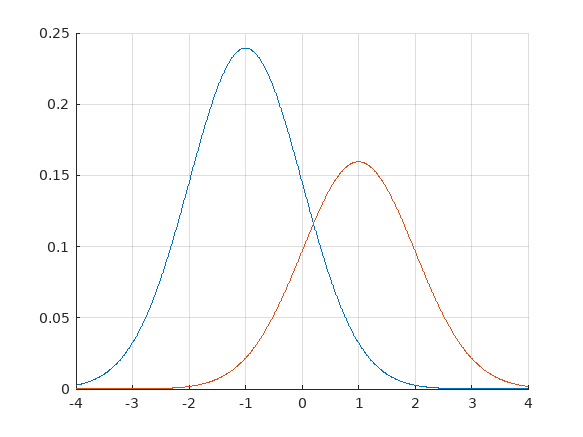

In [2]:
figure(1)
hold on;
grid on;
func0 = @(x) (p0) * gauss_pdf(x, 1, U0);
func1 = @(x) (p1) * gauss_pdf(x, 1, U1);
plot(xvals, arrayfun(func0,xvals));
plot(xvals, arrayfun(func1,xvals));

2.  Berechnen Sie die Fehlerwahrscheinlichkeit für eine beliebige
    Entscheiderschwelle$U_{E}$.Skizzieren Sie diese mit $U_{E}$als
    Variable.

> Hinweis: Für Integralrechnung in Matlab können Sie „function handles“
> und die Funktion „integral“ benutzen. Beispiel: Der function handle
> von $f\left( x \right) = x^{2}$ ist f = @(x)x.^2.  
> Das Integral $\int_{0}^{1}{f\left( x \right)\text{dx}}$ kann
> überintegral(f,0,1) bestimmt werden.

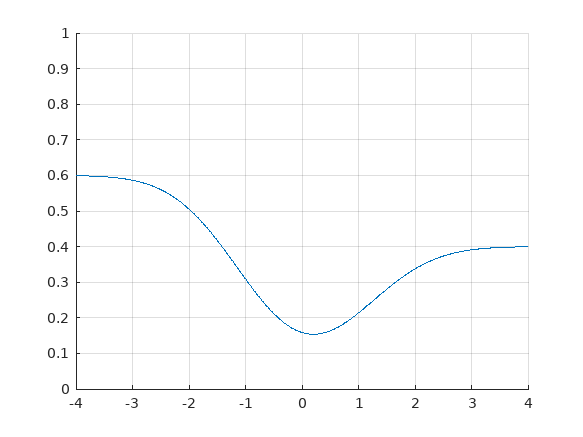

In [3]:
figure(2);
hold on;
grid on;
errfunc = @(Ue) fehlerwahrscheinlichkeit(Ue,func0,func1);
errvals = arrayfun(errfunc, xvals);
ylim([0 1]);
plot(xvals, errvals);

3.  Für welche Schwelle $U_{E0}$ ist die Fehlerwahrscheinlichkeit am
    geringsten?

In [4]:
Uemin = fminbnd(errfunc,-4,4)

Uemin = 0.2027

4.  Wie groß ist die Fehlerwahrscheinlichkeit für $U_{E0}$?

In [5]:
errfunc(Uemin)

ans = 0.1538

5.  Wie sieht die Kurve aus, wenn $p_{1}$ nur noch $p_{1} = 0.2$beträgt?
    Wo liegt nun das Minimum?

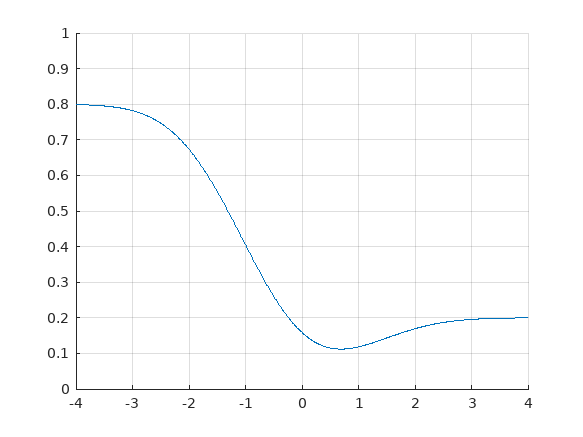

Uemin = 0.6932

In [6]:
p0 = 0.8; % ???
p1 = 0.2;
figure(3);
hold on;
grid on;
func0 = @(x) (p0) * gauss_pdf(x, 1, U0);
func1 = @(x) (p1) * gauss_pdf(x, 1, U1);
errfunc = @(Ue) fehlerwahrscheinlichkeit(Ue,func0,func1);
errvals = arrayfun(errfunc, xvals);
ylim([0 1]);
plot(xvals, errvals);

Uemin = fminbnd(errfunc,-4,4)

6.  Die Quelle liefere nun vier Amplitudenwerte, die alle
    gleichwahrscheinlich sind. Bei wie viel dB muss der
    Signal-Störabstand mindestens liegen, damit eine Fehlerrate von
    $10^{- 4}$ nicht überschritten wird?

> Hinweis: Benutzen Sie den data coursor
> 
> oder die Funktion „ginput“, um die Achsen abzulesen.

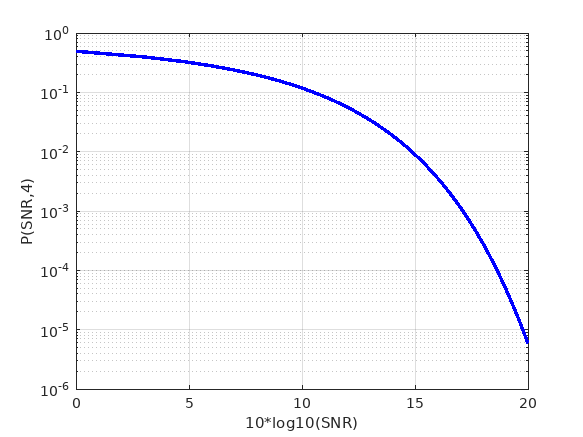

In [7]:
SNR = 0:1:100;
figure(4)

wk4 = symbol_fwk(SNR,4);
semilogy(10*log10(SNR),wk4,'LineWidth',2.5,'Color',[0 0 1]);
grid on
xlabel('10*log10(SNR)')
ylabel('P(SNR,4)')

In [8]:
fr=1e-4;
SNR = 10*log10(find(abs(wk4-fr)<0.00001))

SNR = 18.6923